# Criando Agrupamentos

In [154]:
import pandas as pd

In [155]:
dados = pd.read_csv('../dados/aluguel_res_del_variaveis.csv', sep=';')

In [156]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [157]:
# mostra a média de todos os valores da coluna Valor
# arredondando para 2 casas decimais
round(dados.Valor.mean(), 2)

5046.17

### Consultar documentação de Dataframe do pandas
#### https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

## Verificar os bairros do dataframe

In [158]:
dados['Bairro'].unique()

array(['Copacabana', 'Jardim Botânico', 'Centro', 'Higienópolis',
       'Cachambi', 'Barra da Tijuca', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos', 'Taquara', 'Freguesia (Jacarepaguá)',
       'Tijuca', 'Olaria', 'Ipanema', 'Campo Grande', 'Botafogo',
       'Recreio dos Bandeirantes', 'Leblon', 'Jardim Oceânico', 'Humaitá',
       'Península', 'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'São Conrado', 'Vila Valqueire', 'Gávea', 'Cosme Velho',
       'Bonsucesso', 'Todos os Santos', 'Laranjeiras', 'Itanhangá',
       'Flamengo', 'Piedade', 'Lagoa', 'Catete', 'Jardim Carioca',
       'Benfica', 'Glória', 'Praça Seca', 'Vila Isabel', 'Engenho Novo',
       'Engenho de Dentro', 'Pilares', 'Água Santa', 'São Cristóvão',
       'Ilha do Governador', 'Jardim Sulacap', 'Oswaldo Cruz',
       'Vila da Penha', 'Anil', 'Vargem Grande', 'Tanque', 'Vaz Lobo',
       'Madureira', 'São Francisco Xavier', 'Pechincha', 'Leme', 'Irajá',
       'Quintino Bocaiúva', 'Urca', 'Penha',

## Fazendo uma seleção com o método isin()

In [159]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [160]:
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

#### Também é possível fazer dessa forma, mas o comando fica enorme dependendo da quantidade de valores
##### Repare que mesmo usando apenas 2 valores de exemplo é fácil se perder com o comando

In [161]:
selecao2 = (dados['Bairro'] == 'Copacabana') | (dados['Bairro'] == 'Tijuca')
dados2 = dados[selecao2]
dados2['Bairro'].drop_duplicates()

0     Copacabana
15        Tijuca
Name: Bairro, dtype: object

## Agrupando com groupby

* para usar o groupby é necessário passar a variável desejada dentro dos parênteses
* é criado um objeto do tipo DataFrameGroupBy, do pandas
* esse método cria um dicionário, com uma indexação baseada no valor da variável e o index que cada valor foi encontrado no dataframe

In [162]:
grupo_bairro = dados.groupby('Bairro')
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [163]:
# a chave é o valor (nome) da variável
# a lista traz o index de cada valor encontrado no dataframe
grupo_bairro.groups

{'Barra da Tijuca': [5, 14, 16, 21, 30, 32, 35, 42, 43, 60, 61, 64, 68, 74, 79, 93, 107, 110, 112, 117, 130, 132, 136, 150, 153, 155, 165, 166, 173, 186, 189, 207, 214, 221, 224, 233, 236, 239, 244, 259, 265, 274, 276, 291, 292, 293, 295, 302, 308, 311, 325, 335, 336, 345, 360, 366, 368, 374, 380, 387, 389, 400, 412, 432, 433, 435, 436, 439, 449, 451, 462, 463, 465, 473, 476, 484, 494, 500, 503, 511, 537, 538, 539, 540, 543, 547, 552, 554, 555, 556, 584, 587, 588, 590, 594, 596, 601, 611, 622, 630, ...], 'Botafogo': [23, 48, 87, 88, 111, 119, 127, 134, 196, 200, 225, 334, 362, 415, 416, 498, 524, 526, 545, 593, 649, 685, 719, 756, 765, 822, 827, 861, 915, 924, 928, 1006, 1043, 1080, 1091, 1110, 1116, 1127, 1140, 1165, 1201, 1205, 1223, 1250, 1282, 1295, 1304, 1317, 1348, 1383, 1414, 1419, 1455, 1517, 1529, 1579, 1630, 1655, 1670, 1699, 1741, 1742, 1788, 1814, 1823, 1826, 1853, 1922, 1931, 1957, 1972, 1981, 1989, 2029, 2066, 2069, 2081, 2083, 2084, 2088, 2097, 2148, 2149, 2165, 2179, 21

## Criando uma média para cada bairro

In [164]:
# essa variável dados refere-se só ao laço
# ela guarda os valores do dataframe de cada bairro
# alteramos a variável dados para data
for bairro, data in grupo_bairro:
    print(f'{bairro} -> {data.Valor.mean():.2f}')

Barra da Tijuca -> 7069.55
Botafogo -> 8791.83
Copacabana -> 4126.68
Flamengo -> 4113.53
Ipanema -> 9352.00
Leblon -> 8746.34
Tijuca -> 2043.52


## Tirando a média usando o groupby

In [165]:
# fica muito mais simples usando o agrupamento
grupo_bairro.Valor.mean().round(2)

Bairro
Barra da Tijuca    7069.55
Botafogo           8791.83
Copacabana         4126.68
Flamengo           4113.53
Ipanema            9352.00
Leblon             8746.34
Tijuca             2043.52
Name: Valor, dtype: float64

In [166]:
# também é possível passar mais de uma variável
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


## Exercício

Considere o seguinte DataFrame para responder o exercício abaixo:

In [167]:
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])

In [168]:
alunos

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
1,Cátia,27,F,2.5,False
2,Denis,56,M,5.0,False
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True
6,Carlos,19,M,6.0,False
7,Alice,35,F,5.6,False


Como devemos proceder para obter um **DataFrame** com as notas médias dos alunos, com duas casas decimais, segundo seu sexo?

In [169]:
sexo = alunos.groupby('Sexo')
sexo = pd.DataFrame(sexo['Notas'].mean().round(2))
sexo.columns = ['Notas Médias']
sexo

,Notas Médias
Sexo,
F,5.82
M,7.12


# Estatísticas Descritivas

### Reaproveitando o notebook anterior

* foi alterado a variável dados que estava dentro do for, para data
* a seleção de bairros pode ser deixada comentada para visualizar alguns problemas mais abaixo

## Observando a variável valor

In [170]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


### Descrevendo as variáveis

* count = frequência
* mean = média
* std = desvio padrão
* min = valor mínimo
* 25% = 1º quartil
* 50% = mediana
* 75% = 2º quartil
* max = valor máximo

### Observações relevantes

* observando o desvio padrão podemos ver grandes discrepâncias em Barra da Tijuca e Botafogo
* em valor máximo podemos ver que há valores fora do comum nesses bairros, pois trata-se de alugueis

## Selecionando dados estatísticos

In [171]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


### Modificando o nome das colunas

In [172]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,800.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


### Observações

* em uma base de dados muito grande, talvez essa discrepância passaria desapercebida
* simplesmente se visualizássemos em todos os bairros, já seria muito mais difícil identidicar esse problema
* portanto, faz-se necessário a visualização de dados, para isso podemos usar ferramentas visuais como o matplotlib e o seaborn

## Visualização com Matplotlib

In [173]:
# o inline faz o matplot mostrar uma figura estática na tela
%matplotlib inline
import matplotlib.pyplot as plt
# configurando o tamanho do gráfico
plt.rc('figure', figsize=(20, 10))

<AxesSubplot:xlabel='Bairro'>

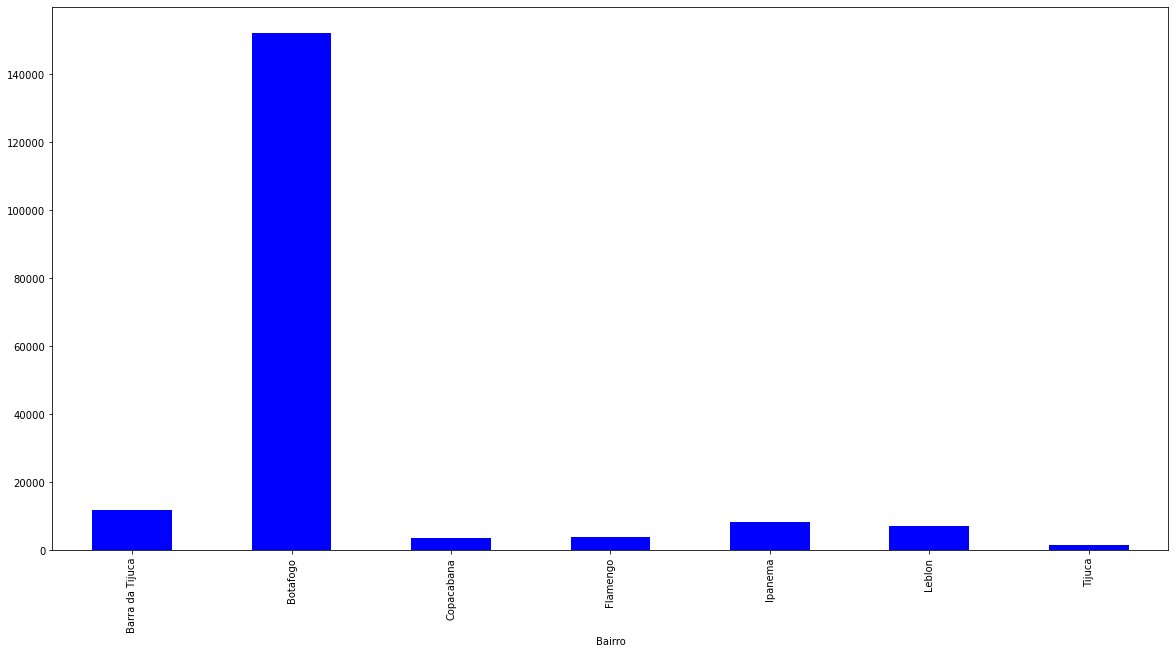

In [174]:
grupo_bairro['Valor'].std().plot.bar(color = 'blue')

### Ajustando o gráfico

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

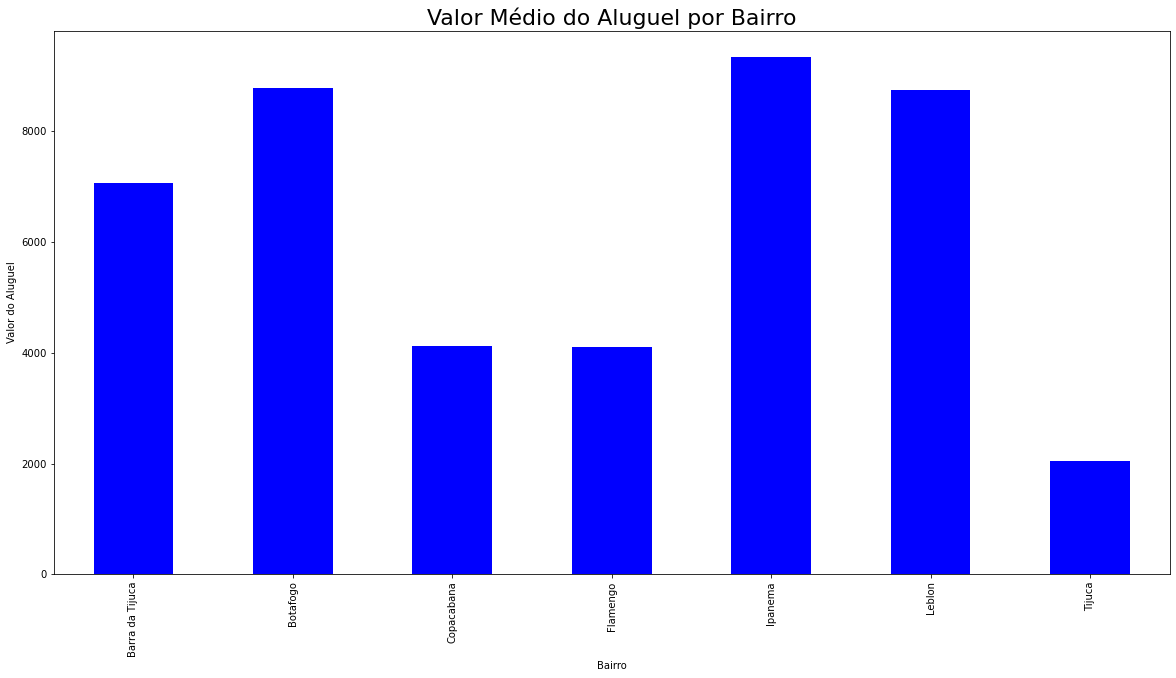

In [175]:
# verificando agora a média
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
# altera a legenda do eixo y
fig.set_ylabel('Valor do Aluguel')
# altera o título do gráfico, especificando uma fonte
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Máximo do Aluguel por Bairro')

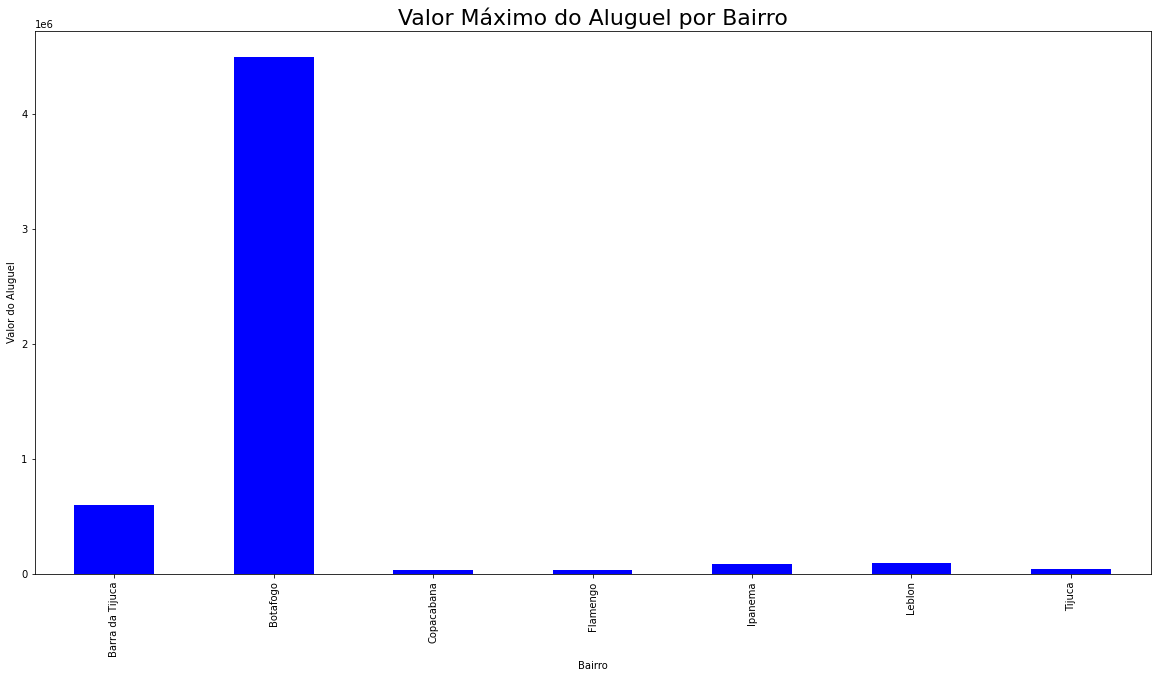

In [176]:
# verificando agora o máximo
fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Máximo do Aluguel por Bairro', {'fontsize': 22})

## Exercício

A criação de grupamentos com o método groupby() facilita bastante na sumarização das informações de um DataFrame. O método describe() aplicado a um grupamento gera um conjunto de estatísticas descritivas bastante útil no processo de análise de dados, conforme o exemplo abaixo:

In [177]:
precos = pd.DataFrame([['Feira', 'Cebola', 2.5], 
                        ['Mercado', 'Cebola', 1.99], 
                        ['Supermercado', 'Cebola', 1.69], 
                        ['Feira', 'Tomate', 4], 
                        ['Mercado', 'Tomate', 3.29], 
                        ['Supermercado', 'Tomate', 2.99], 
                        ['Feira', 'Batata', 4.2], 
                        ['Mercado', 'Batata', 3.99], 
                        ['Supermercado', 'Batata', 3.69]], 
                        columns = ['Local', 'Produto', 'Preço'])
precos

,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


In [180]:
produtos = precos.groupby('Produto')
produtos['Preço'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Produto,,,,,,,,
Batata,3.0,3.96,0.26,3.69,3.84,3.99,4.10,4.2
Cebola,3.0,2.06,0.41,1.69,1.84,1.99,2.24,2.5
Tomate,3.0,3.43,0.52,2.99,3.14,3.29,3.64,4.0


Utilizando o DataFrame (precos) acima, que código seria necessário para gerar a visualização abaixo:

![](../dados/exercicio4.JPG)

In [179]:
estatisticas = ['mean', 'std', 'min', 'max']
nomes = {'mean': 'Média', 'std': 'Desvio Padrão', 'min': 'Mínimo', 'max': 'Máximo'}
produtos['Preço'].aggregate(estatisticas).round(2).rename(
    columns=nomes)


,Média,Desvio Padrão,Mínimo,Máximo
Produto,,,,
Batata,3.96,0.26,3.69,4.2
Cebola,2.06,0.41,1.69,2.5
Tomate,3.43,0.52,2.99,4.0
